<a href="https://colab.research.google.com/github/R-Soorya/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install gradio

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
import gradio as gr
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=UserWarning)

# Data Collection and Analysis


In [ ]:
# Loading the dataset

data = pd.read_csv('diabetes - diabetes.csv')

In [ ]:
# printing the first 5 rows of the dataset

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0
2,8,183,64,0,0,23.3,0.672,32,1.0
3,1,89,66,23,94,28.1,0.167,21,0.0
4,0,137,40,35,168,43.1,2.288,33,1.0


In [ ]:
# number of rows and Columns in this dataset

data.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,767.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.349413
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data['Outcome'].value_counts()

Outcome
0.0    499
1.0    268
Name: count, dtype: int64

In [ ]:
# Finding the basic informations of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   767 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [ ]:
# Find the null values

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     1
dtype: int64

In [ ]:
# Finding the features

data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Handling the null values by using KNNImputer

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data['Outcome'] = imputer.fit_transform(data)[:, -1]

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Transforming the continous target to discrete target

threshold = 1
data['Outcome'] = data['Outcome'].apply(lambda x:1 if x==threshold else 0)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# separating the data and labels

X = data.drop(columns = 'Outcome', axis = 1)
y = data['Outcome']

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Visualization

<ipython-input-77-082898d48e5b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i + 1)


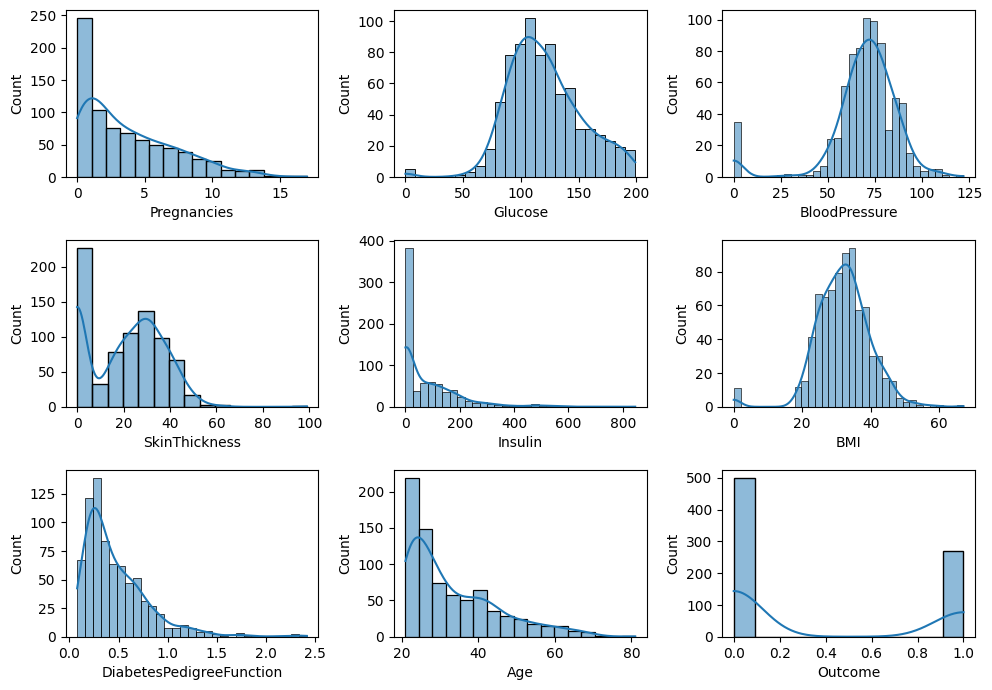

In [ ]:
# Visualizing the distribution of the data

plt.subplots(figsize=(10, 7))
for i, col in enumerate(data.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col],kde=True)
plt.tight_layout()
plt.show()

<Axes: >

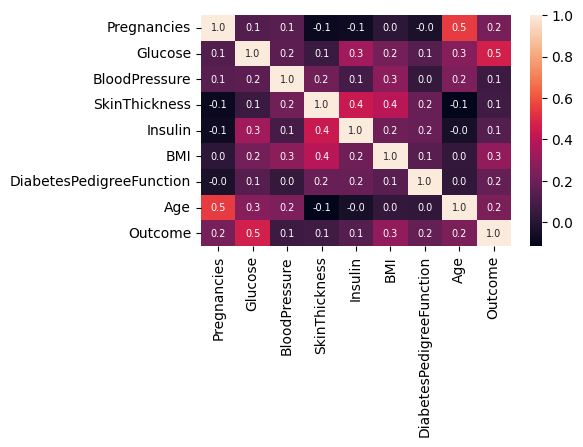

In [ ]:
# Visualizing the correlation of the features

plt.figure(figsize=(5,3))
sns.heatmap(data.corr(),annot=True,fmt='.1f',annot_kws={'size':7})

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-1.13796489, -0.07971099, -3.5556072 , ...,  0.02825037,
        -0.98159708, -0.7885233 ],
       [ 0.64067858, -0.52091877,  0.02549599, ..., -0.17184452,
        -1.03823795,  0.31879426],
       [-0.84152431,  2.12632792, -0.48609018, ..., -0.25938604,
        -0.21545477,  2.19271628],
       ...,
       [ 2.12288146, -1.15121561,  0.23013046, ..., -0.25938604,
        -0.50760242,  0.14843771],
       [ 0.04779742, -0.30031488,  0.43476492, ...,  0.90366551,
        -0.69839272,  0.40397253],
       [-1.13796489, -1.11970076, -0.07682125, ...,  0.45345201,
        -0.69243053, -0.70334503]])

# Training the Model

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear')

# Prediction and Evaluation on Training Set

In [ ]:
X_train_pred = svc.predict(X_train_scaled)
accuracy = accuracy_score(X_train_pred, y_train)
accuracy

0.7866449511400652

# Prediction and Evaluation on Test Set

In [ ]:
X_test_pred = svc.predict(X_test_scaled)
accuracy = accuracy_score(X_test_pred, y_test)
accuracy

0.7727272727272727

# Making a Predictive System

In [ ]:
def prediction(Pregnancies, Glucose, Blood_Pressure, Skin_Thickness, Insulin, BMI, Diabetes_Pedigree_Function, Age):
    input_data = np.array([Pregnancies, Glucose, Blood_Pressure, Skin_Thickness, Insulin, BMI, Diabetes_Pedigree_Function, Age])
    input_data_reshaped = input_data.reshape(1,-1)
    scaled = scaler.transform(input_data_reshaped)
    predictions = svc.predict(scaled)
    if predictions[0] == 0:
        return "The person is not diabetic"
    return "The person is diabetic"

In [ ]:
user_interface = gr.Interface(fn = prediction,
                              inputs = ['number','number','number','number','number','number','number','number'],
                             outputs = ['text'])

In [ ]:
user_interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0c8fec5ab93e9a79c0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
